### Real Zeros of Polynomials

In [102]:
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# initiate pretty print
sp.init_printing()

# define parameter
t = sp.Symbol('t')

Define polynomial

In [103]:
my_polynomial = t**2 + 1
my_polynomial

Check: find roots (solve p for t), including multiplicities, and plot it

In [104]:
roots = sp.roots(my_polynomial)
roots

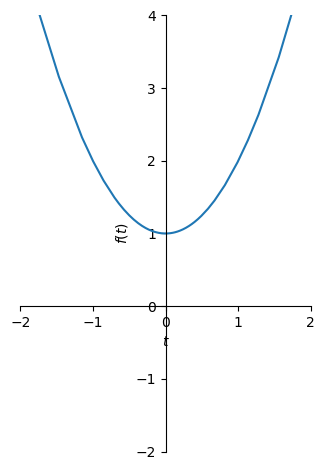

In [105]:
ax = sp.plot(my_polynomial, xlim=(-2, 2), ylim=(-2,4), aspect_ratio=(1,1))

Prepare polynomial, companion matrix, newton sums, Hankel matrix

In [106]:
# define Sympy polynomial object 
p = sp.Poly(my_polynomial, t, domain='RR')

# get coefficients and degree
coeffs = p.all_coeffs()
deg = p.degree()

In [107]:
# companion matrix
companion_matrix = sp.zeros(deg)
for i in range(deg - 1):
    companion_matrix[i + 1, i] = 1
for i in range(deg):
    companion_matrix[i, -1] = -1 * coeffs[::-1][i]

companion_matrix



⎡0  -1.0⎤
⎢       ⎥
⎣1   0  ⎦

In [108]:
# newton sums
newton_sums = []
for k in range(2*deg - 1):
    V_k = companion_matrix ** k
    newton_sums.append(V_k.trace())

newton_sums

In [109]:
# construct the Hankel matrix
hankel_matrix = sp.zeros(deg)
for i in range(deg):
    for j in range(deg):
        hankel_matrix[i, j] = newton_sums[i+j]

hankel_matrix

⎡2   0  ⎤
⎢       ⎥
⎣0  -2.0⎦

In [110]:
eigenvalues = hankel_matrix.eigenvals()

# Count the positive and negative eigenvalues
positive_eigenvalues = sum(1 for eigenvalue in eigenvalues if eigenvalue > 0)
negative_eigenvalues = sum(1 for eigenvalue in eigenvalues if eigenvalue < 0)

# Calculate the signature
signature = positive_eigenvalues - negative_eigenvalues
rank = hankel_matrix.rank()

Rank of the matrix:

In [111]:
rank

Signature of the matrix:

In [112]:
signature

Roots again:

In [113]:
roots